# Heart Failure Prediction

In [215]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# About the Data

- Age of the Patient, Between 40 and 95
- Anaemia, binary, does the patient has low red-blood cells and iron levels
- creatinine phosphokinase, int, Level of the CPK enzyme in the blood (mcg/L)
- diabetes, binary, does the patiens has anormaly high blood sugar?
- ejection_fraction, int, Percentage of blood leaving the heart at each contraction (percentage)
- high_blood_pressure, bool
- platelets, float, Platelets in the blood (kiloplatelets/mL)
- serum creatinine, float, Level of serum creatinine in the blood (mg/dL)
- serum sodium, float, Level of serum sodium in the blood (mEq/L)
- sex, binary, 1 for men, 0 for women
- smoking, binary, 1 for smokers, 0 or non-smokers
- time, int, days-after the heart failure event
- DEATH_EVENT, binary, did the patient die during the follow-period

In [4]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Data Visualization

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

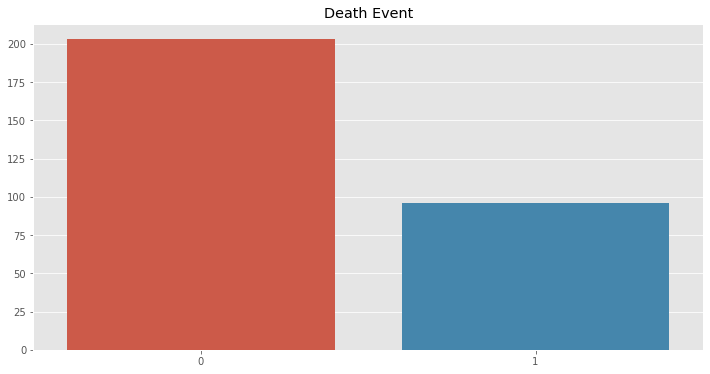

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='DEATH_EVENT')
plt.title('Death Event')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

In [7]:
df.DEATH_EVENT.value_counts(normalize=True)

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

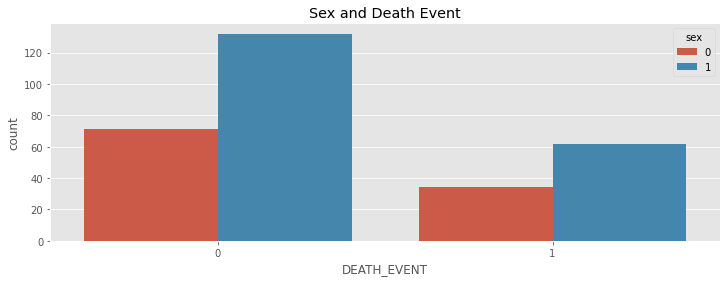

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='DEATH_EVENT', hue='sex')
plt.title('Sex and Death Event')
plt.show()

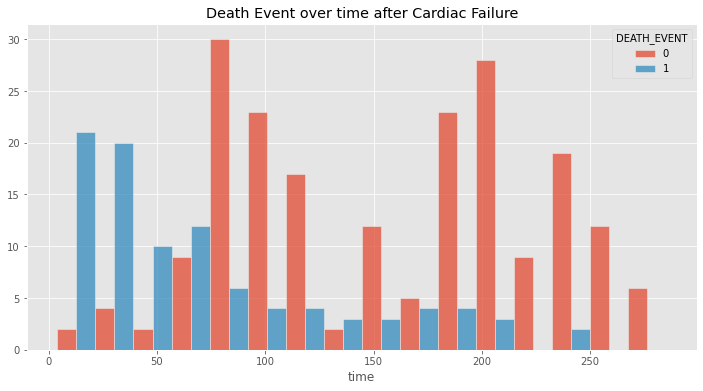

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='time', hue='DEATH_EVENT', bins=16, multiple='dodge')
plt.title('Death Event over time after Cardiac Failure')
plt.ylabel(None)
plt.show()

We can see that the risk of death is really high in the two months after the heart failure, after that, the patients have higher chance of survival

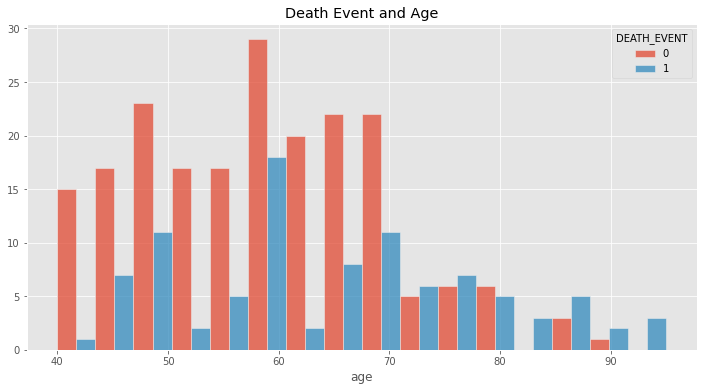

In [15]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='age', hue='DEATH_EVENT', multiple='dodge', bins=16)
plt.title('Death Event and Age')
plt.ylabel(None)
plt.show()

The survival rate is reducing with age. The older the patient, the more important it is to prevent heart failure

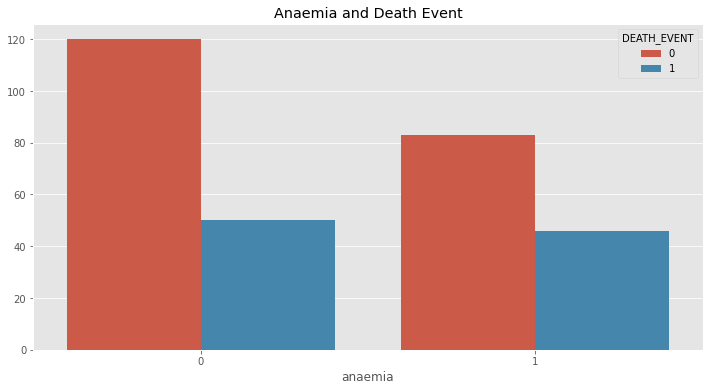

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='anaemia', hue='DEATH_EVENT')
plt.title('Anaemia and Death Event')
plt.ylabel(None)
plt.show()

Anaemia increase the risk of dying after the heart failure

<h1>Creatinine and CPK</h1>

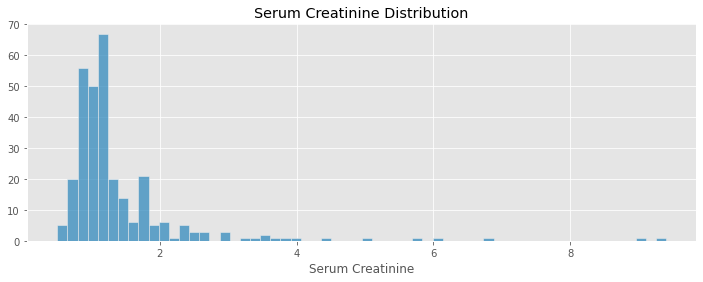

In [11]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='serum_creatinine')
plt.title('Serum Creatinine Distribution')
plt.xlabel('Serum Creatinine')
plt.ylabel(None)
plt.show()

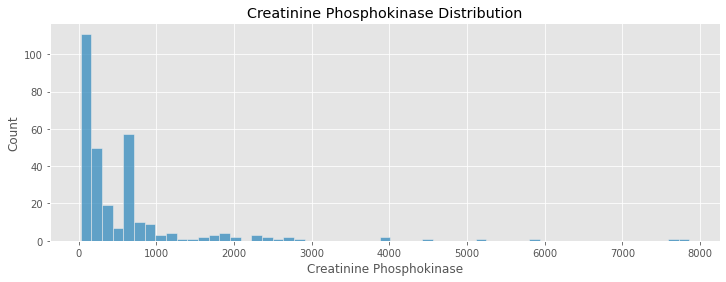

In [12]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='creatinine_phosphokinase')
plt.title('Creatinine Phosphokinase Distribution')
plt.xlabel('Creatinine Phosphokinase')
plt.show()

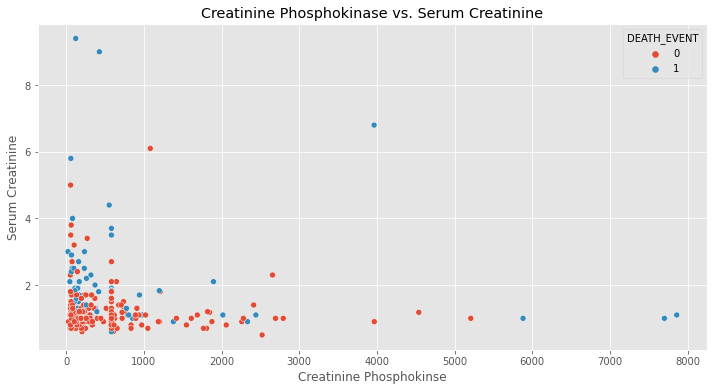

In [13]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='creatinine_phosphokinase', y='serum_creatinine', hue='DEATH_EVENT')
plt.title('Creatinine Phosphokinase vs. Serum Creatinine')
plt.xlabel('Creatinine Phosphokinse')
plt.ylabel('Serum Creatinine')
plt.show()

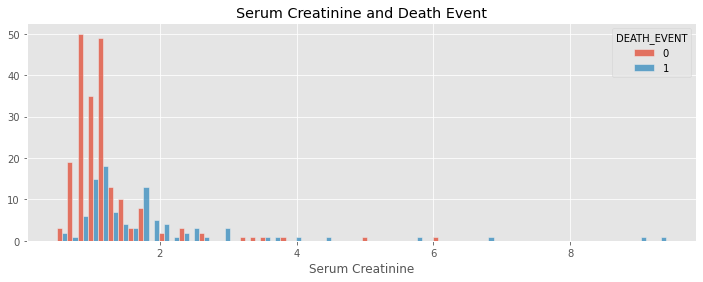

In [14]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', multiple='dodge')
plt.title('Serum Creatinine and Death Event')
plt.ylabel(None)
plt.xlabel('Serum Creatinine')
plt.show()

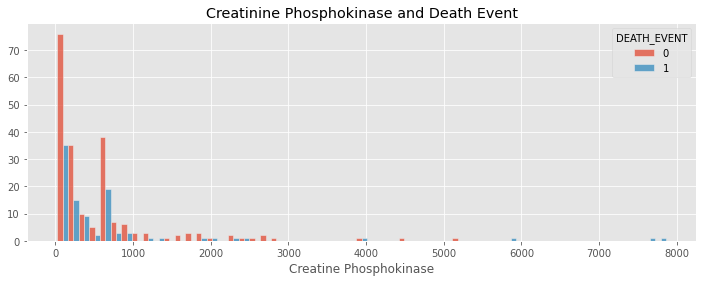

In [15]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT', multiple='dodge')
plt.title('Creatinine Phosphokinase and Death Event')
plt.ylabel(None)
plt.xlabel('Creatine Phosphokinase')
plt.show()

<h1>Diabetes</h1>

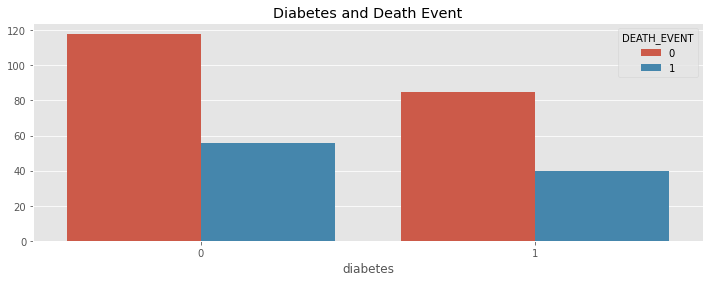

In [16]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='diabetes', hue='DEATH_EVENT')
plt.title('Diabetes and Death Event')
plt.ylabel(None)
plt.show()

<h1>Ejection Fraction</h1>

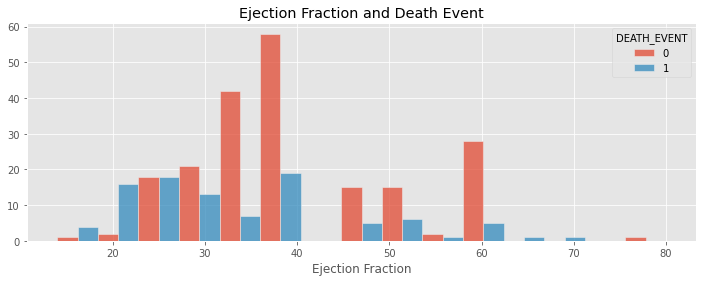

In [17]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='ejection_fraction', hue='DEATH_EVENT', multiple='dodge')
plt.title('Ejection Fraction and Death Event')
plt.xlabel('Ejection Fraction')
plt.ylabel(None)
plt.show()

having a larger ejection fraction seems to reduce the risk of death after cardiac failure. Because of the insufficient sample we cannot interpret the extreme values (< 20 and > 65)

<h1>Blood Pressure</h1>

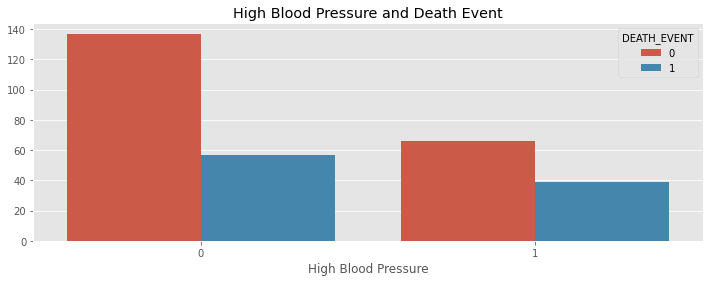

In [18]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='high_blood_pressure', hue='DEATH_EVENT')
plt.title('High Blood Pressure and Death Event')
plt.ylabel(None)
plt.xlabel('High Blood Pressure')
plt.show()

high blood pressure increases the risk of death after cardiac failure

<h1>Platelets</h1>

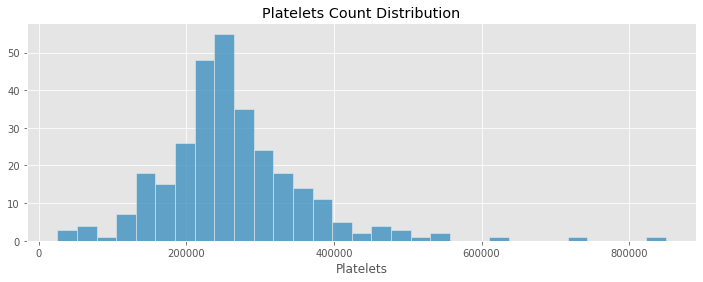

In [19]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='platelets')
plt.title('Platelets Count Distribution')
plt.xlabel('Platelets')
plt.ylabel(None)
plt.show()

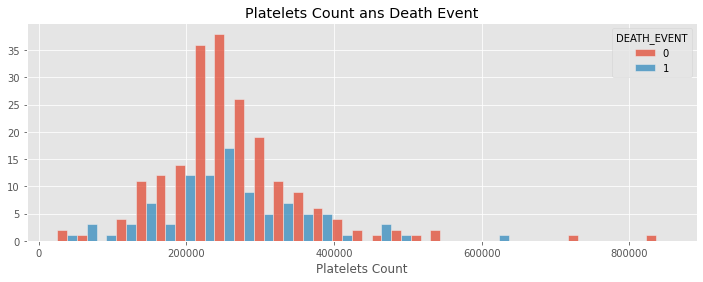

In [20]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='platelets', hue='DEATH_EVENT', multiple='dodge')
plt.title('Platelets Count ans Death Event')
plt.xlabel('Platelets Count')
plt.ylabel(None)
plt.show()

High and Low platelets count seem to increase the risk of death after a cardiac failure.

<h1>Sodium</h1>

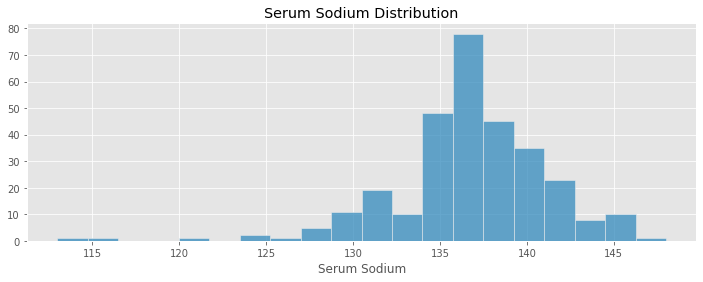

In [21]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='serum_sodium')
plt.title('Serum Sodium Distribution')
plt.ylabel(None)
plt.xlabel('Serum Sodium')
plt.show()

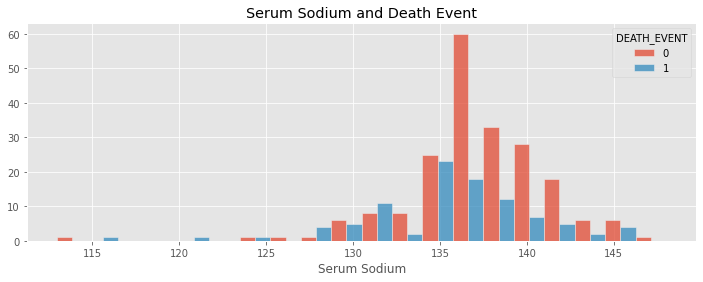

In [22]:
plt.figure(figsize=(12,4))
sns.histplot(data=df, x='serum_sodium', hue='DEATH_EVENT', multiple='dodge')
plt.title('Serum Sodium and Death Event')
plt.xlabel('Serum Sodium')
plt.ylabel(None)
plt.show()

Having a sodium level within normal range reduces the risk of death after heart failure

<h1>smoking</h1>
The data obtain with a countplot are hard to read, we will use pie plots instead

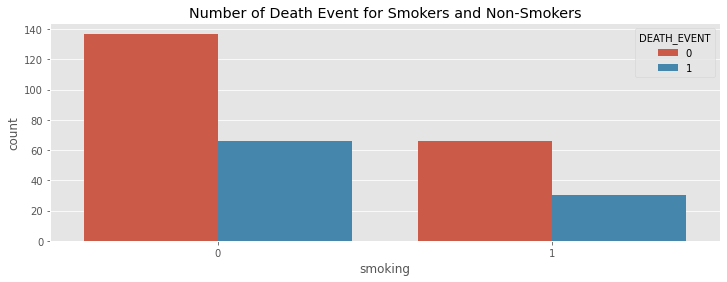

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(data=df, x='smoking', hue='DEATH_EVENT')
plt.title('Number of Death Event for Smokers and Non-Smokers')
plt.show()

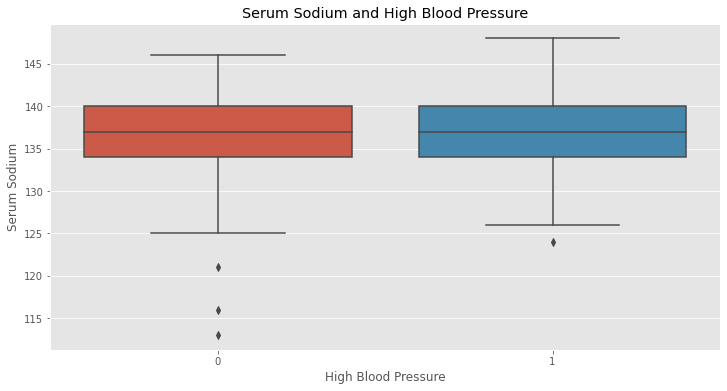

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='high_blood_pressure', y='serum_sodium')
plt.title("Serum Sodium and High Blood Pressure")
plt.xlabel('High Blood Pressure')
plt.ylabel("Serum Sodium")
plt.show()

In [38]:
auto = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT']]
auto

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [14]:
auto.shape

(299, 13)

In [24]:
auto.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


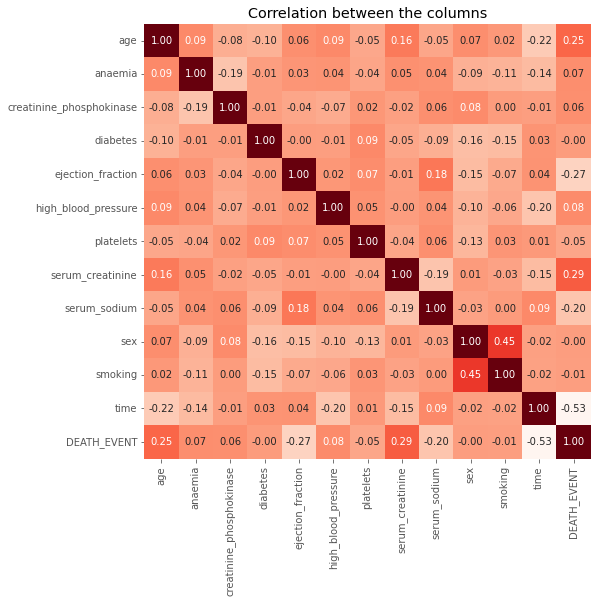

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='Reds', fmt='.2f')
plt.title("Correlation between the columns")
plt.show()

The correlation matrix is only a good indicator when the relationship are linear.

We saw before that have a platelet count within normal range improve the survival rate. But here, the correlation is really low

Except between sex and smoking, the correlation between the variables is really low, a PCA will probably not help.

# ------------------------------------------------------------------

In [40]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(auto, train_size = 0.7, test_size = 0.3, random_state = 100)

In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [42]:
y_train = df_train.pop('DEATH_EVENT') #dependent variable lai chutyaune
X_train = df_train


# RFE

In [43]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LinearRegression

In [44]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE 
rfe = rfe.fit(X_train, y_train)

D:\Anaconda32021.11\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('age', True, 1),
 ('anaemia', True, 1),
 ('creatinine_phosphokinase', False, 2),
 ('diabetes', True, 1),
 ('ejection_fraction', True, 1),
 ('high_blood_pressure', True, 1),
 ('platelets', False, 3),
 ('serum_creatinine', True, 1),
 ('serum_sodium', True, 1),
 ('sex', True, 1),
 ('smoking', True, 1),
 ('time', True, 1)]

In [46]:
col = X_train.columns[rfe.support_]
col

Index(['age', 'anaemia', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'serum_creatinine', 'serum_sodium', 'sex',
       'smoking', 'time'],
      dtype='object')

Creatinine_phosphokinase and platelets are dropped

# Building model using statsmodel for the detailed statistics

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

D:\Anaconda32021.11\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [77]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [50]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            DEATH_EVENT   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.373
Method:                 Least Squares   F-statistic:                     13.40
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           7.54e-18
Time:                        13:00:04   Log-Likelihood:                -81.578
No. Observations:                 209   AIC:                             185.2
Df Residuals:                     198   BIC:                             221.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.5871    

In [62]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = pd.DataFrame()
X = X_train_rfe

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,1254.17
8,sex,1.29
9,smoking,1.28
10,time,1.20
1,age,1.16
6,serum_creatinine,1.16
7,serum_sodium,1.14
4,ejection_fraction,1.10
5,high_blood_pressure,1.08
2,anaemia,1.07


#### All the classes have got values less than 5, so VIF is not a suitable option.
#### At the same time, from the above computations, we came to know that diabetes had good relation to the death event from the heart failure. But, here, it is showing that we have to eliminate it. So, OLS is not a good option.
#### To sum it all up, Linear Regression doesn't well-fit as the model. So, we look for other options.

# ------------------------------------------------------------------


# Let's use other models

In [63]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [199]:
y = df['DEATH_EVENT'].copy()
X = df.drop('DEATH_EVENT', axis=1)

In [204]:
model = LogisticRegression()

y_pred = cross_val_predict(model, X, y, n_jobs=-1, cv=10)

y_proba = cross_val_predict(model, X, y, n_jobs=-1, cv=10, method='predict_proba')
acc = accuracy_score(y, y_pred)

print(f'the accuracy for the logistic regression is {round(acc, 3)}')

the accuracy for the logistic regression is 0.793


In [205]:
model = RandomForestClassifier()

y_pred = cross_val_predict(model, X, y, n_jobs=-1, cv=10)

y_proba = cross_val_predict(model, X, y, n_jobs=-1, cv=10, method='predict_proba')
acc = accuracy_score(y, y_pred)

print(f'the accuracy for the random forest is {round(acc, 3)}')

the accuracy for the logistic regression is 0.749


In [214]:
model = GradientBoostingClassifier()

y_pred = cross_val_predict(model, X, y, n_jobs=-1, cv=10)

y_proba = cross_val_predict(model, X, y, n_jobs=-1, cv=10, method='predict_proba')
acc = accuracy_score(y, y_pred)

print(f'the accuracy for the gradient boosting is {round(acc, 3)}')

the accuracy for the gradient boosting is 0.716


### From above three, Logistic Regression model gives us better result.

# Let's Evaluate the Logistic Regression Model

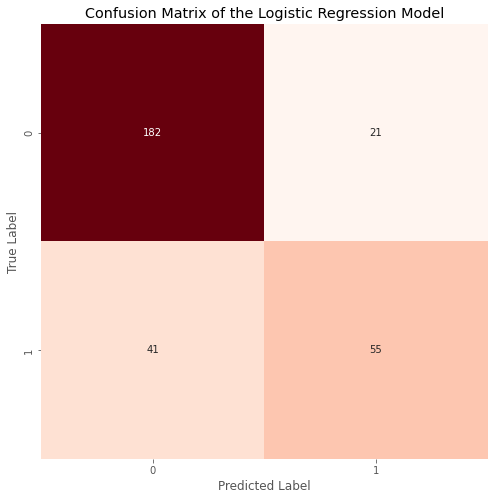

In [66]:
conf_mat = confusion_matrix(y, y_pred)

plt.figure(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cbar=None, cmap='Reds', fmt='.0f')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

In [209]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       203
           1       0.56      0.57      0.57        96

    accuracy                           0.72       299
   macro avg       0.68      0.68      0.68       299
weighted avg       0.72      0.72      0.72       299



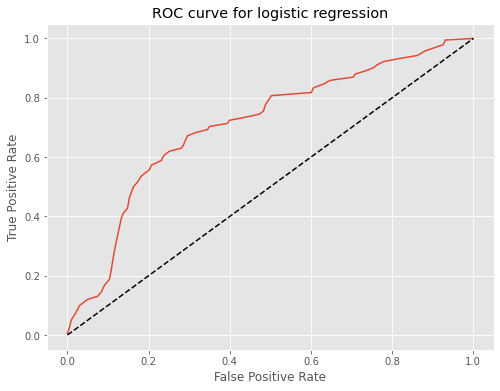

In [208]:
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y, y_proba[:,1])

plt.figure(figsize=(8,6))
sns.lineplot(x=fpr, y=tpr, ci=None)
sns.lineplot(x=[0,1], y=[0,1], linestyle='--', color='black')
plt.title('ROC curve for logistic regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Let's try scaling to improve predictions

In [69]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [90]:
# value_columns = ['creatinine_phosphokinase',
#        'ejection_fraction', 'platelets',
#        'serum_creatinine', 'serum_sodium', 'time']

value_columns = ['age',
       'anaemia', 'diabetes', 'high_blood_pressure',
    'serum_sodium', 'smoking','time']

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer

def create_pipeline(model, model_name, scaler):
    preprocessing = make_column_transformer(
        (scaler, value_columns),
        remainder='passthrough')
    
    pipeline = Pipeline(steps=[
        ('scaling', preprocessing),
        (model_name, model)
    ])
    
    return pipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import make_column_transformer

def create_pipeline(model, model_name, scaler):
    preprocessing = make_column_transformer(
        (scaler, value_columns),
        remainder='passthrough')
    
    pipeline = Pipeline(steps=[
        ('scaling', preprocessing),
        (model_name, model)
    ])
    
    return pipeline

In [91]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [180]:
standard = StandardScaler()
robust = RobustScaler()

boost = GradientBoostingClassifier()
forest = RandomForestClassifier()
logreg = LogisticRegression()

boost_standard = create_pipeline(boost, 'GradientBoosting', standard)
forest_standard = create_pipeline(forest, 'RandomForest', robust)
logreg_standard = create_pipeline(logreg, 'LogisticRegression',standard)

**Random Forest**

The accuracy score for RandomForest after scaling is: 0.773


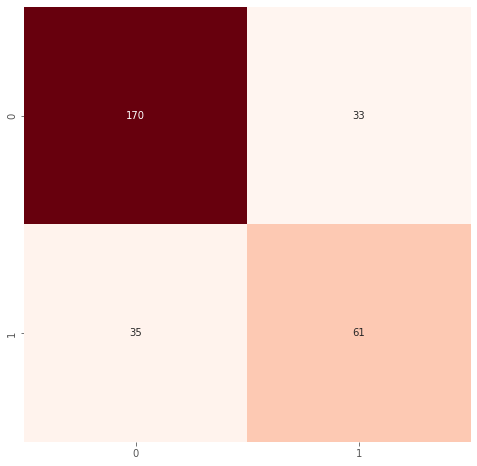

In [187]:
y_pred = cross_val_predict(forest_standard, X, y, cv=10, n_jobs=-1)

acc = round(accuracy_score(y, y_pred), 3)

print(f'The accuracy score for RandomForest after scaling is: {acc}')

mat = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(mat, annot=True, cbar=None, cmap='Reds', fmt='.0f');

**Gradient Boosting**

The accuracy score of Gradient Boosting after scaling is: 0.719


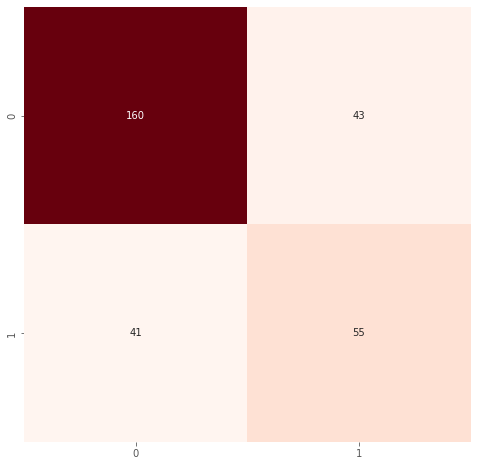

In [179]:
y_pred = cross_val_predict(boost_standard, X, y, cv=10, n_jobs=-1)

acc = round(accuracy_score(y, y_pred), 3)

print(f"The accuracy score of Gradient Boosting after scaling is: {acc}")

plt.figure(figsize=(8,8))
mat = confusion_matrix(y, y_pred)
sns.heatmap(mat, annot=True, cmap='Reds', cbar=None, fmt='.0f');

**Logistic Regression**

In [ ]:
y_pred = cross_val_predict(logreg_standard, X, y, n_jobs=-1, cv=10)

acc = round(accuracy_score(y, y_pred), 3)

print(f"The accuracy score for Logistic Regression after data scaling is {acc}")

matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(matrix, annot=True, fmt=".0f", cbar=None, cmap='Reds');

In [213]:
print('Predicted Value: {}'.format(round(y_pred[50], 1)))
print('Actual Value: {}'.format(y[50]))

Predicted Value: 1
Actual Value: 1


# Conclusion

In this dataset, the logistic regression model gave the best results. 
Scaling was insignificant.